<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-all.csv'

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv(
    path,
    low_memory=False,
    parse_dates=['time']
)

df.head()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,12.2,78,ENE,1013.88,0.00,67.30,10,26.3,0,0
1,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,24.8,22,NNE,1010.96,0.02,79.70,63,27.2,0,0
2,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,15.5,358,N,1011.55,0.92,88.90,65,27.6,0,0
3,Makati,Manila,Philippines,121.03,14.57,2021-12-10 01:00:00,24.6,0,Clear,10.9,75,ENE,1013.73,0.00,63.67,14,26.1,0,0
4,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,24.7,22,NNE,1010.72,0.02,76.93,64,27.2,0,2


In [18]:
df.describe()

,longitude,latitude,temp_c,is_day,wind_kph,wind_degree,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
count,1584.000000,1584.00000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,122.493333,11.86000,26.464457,0.472222,18.891919,57.897727,1010.933933,0.308472,78.707513,55.366793,29.398801,0.091540,11.040404
std,1.168910,1.92347,1.806381,0.499385,10.069220,57.312607,3.302281,1.038428,9.257546,28.122913,2.694367,0.288467,24.023933
min,121.030000,10.31000,23.200000,0.000000,0.400000,0.000000,984.710000,0.000000,51.700000,0.000000,25.500000,0.000000,0.000000
25%,121.030000,10.31000,25.100000,0.000000,12.600000,27.000000,1009.837500,0.000000,72.000000,32.000000,27.400000,0.000000,0.000000
50%,122.560000,10.70000,25.900000,0.000000,17.600000,42.000000,1011.290000,0.020000,79.815000,56.000000,28.600000,0.000000,1.000000
75%,123.890000,14.57000,27.600000,1.000000,23.300000,66.000000,1012.660000,0.210000,86.430000,79.000000,30.700000,0.000000,3.000000
max,123.890000,14.57000,32.400000,1.000000,115.900000,358.000000,1017.330000,12.610000,98.800000,100.000000,41.400000,1.000000,81.000000


In [21]:
precipitation = df.pop('precipitation')

df.insert(0, 'precipitation', precipitation)

df.head()

,precipitation,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,0.00,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,12.2,78,ENE,1013.88,67.30,10,26.3,0,0
1,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,24.8,22,NNE,1010.96,79.70,63,27.2,0,0
2,0.92,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,15.5,358,N,1011.55,88.90,65,27.6,0,0
3,0.00,Makati,Manila,Philippines,121.03,14.57,2021-12-10 01:00:00,24.6,0,Clear,10.9,75,ENE,1013.73,63.67,14,26.1,0,0
4,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,24.7,22,NNE,1010.72,76.93,64,27.2,0,2


## Correlation Matrix

In [23]:
corr = df.corr().round(3)

In [24]:
corr.style.background_gradient()

,precipitation,longitude,latitude,temp_c,is_day,wind_kph,wind_degree,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
precipitation,1.000000,0.205000,-0.167000,-0.037000,0.052000,0.291000,0.425000,-0.504000,0.337000,0.267000,0.005000,0.139000,0.177000
longitude,0.205000,1.000000,-0.921000,-0.133000,0.026000,0.115000,-0.061000,-0.239000,0.695000,0.143000,0.031000,0.174000,0.236000
latitude,-0.167000,-0.921000,1.000000,0.133000,-0.021000,-0.275000,0.158000,0.314000,-0.714000,-0.114000,-0.057000,-0.157000,-0.215000
temp_c,-0.037000,-0.133000,0.133000,1.000000,0.652000,0.008000,0.060000,-0.030000,0.109000,-0.224000,0.965000,-0.129000,-0.152000
is_day,0.052000,0.026000,-0.021000,0.652000,1.000000,0.116000,0.019000,-0.026000,0.053000,0.031000,0.630000,0.020000,0.013000
wind_kph,0.291000,0.115000,-0.275000,0.008000,0.116000,1.000000,0.023000,-0.387000,0.317000,0.443000,0.077000,0.144000,0.270000
wind_degree,0.425000,-0.061000,0.158000,0.060000,0.019000,0.023000,1.000000,-0.389000,0.022000,0.010000,0.028000,-0.053000,-0.018000
air_pressure,-0.504000,-0.239000,0.314000,-0.030000,-0.026000,-0.387000,-0.389000,1.000000,-0.263000,-0.062000,-0.107000,0.066000,-0.031000
relative_humidity,0.337000,0.695000,-0.714000,0.109000,0.053000,0.317000,0.022000,-0.263000,1.000000,0.244000,0.255000,0.212000,0.275000
cloud,0.267000,0.143000,-0.114000,-0.224000,0.031000,0.443000,0.010000,-0.062000,0.244000,1.000000,-0.190000,0.307000,0.422000


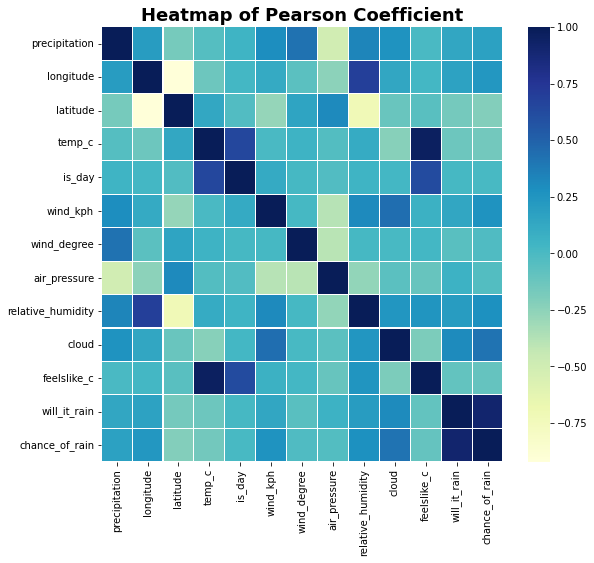

In [40]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.title("Heatmap of Pearson Coefficient", fontweight='bold', fontsize=18)
plt.show();

### Scatter Plotting

#### Precipitation and Longitude, Latitude

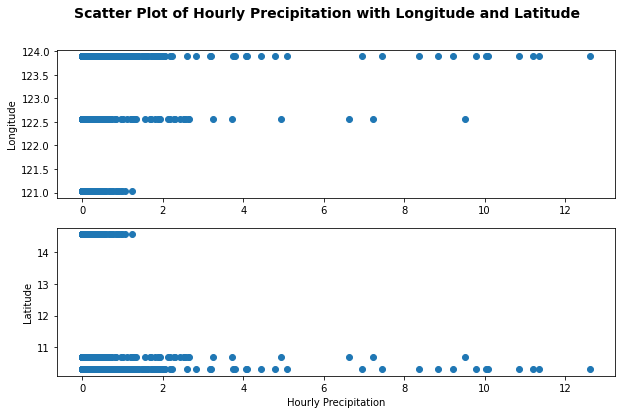

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Longitude and Latitude', fontweight='bold', fontsize=14)

ax1.scatter(df['precipitation'], df['longitude'])
ax1.set_ylabel('Longitude')

ax2.scatter(df['precipitation'], df['latitude'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Latitude')

plt.show()

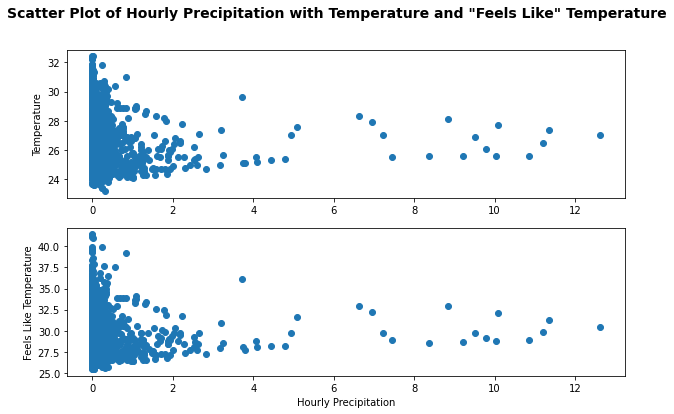

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Temperature and "Feels Like" Temperature', fontweight='bold', fontsize=14)

ax1.scatter(df['precipitation'], df['temp_c'])
ax1.set_ylabel('Temperature')

ax2.scatter(df['precipitation'], df['feelslike_c'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Feels Like Temperature')

plt.show()

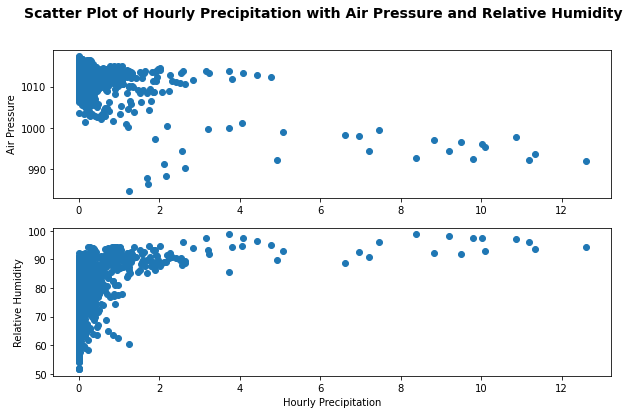

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Air Pressure and Relative Humidity', fontweight='bold', fontsize=14)

ax1.scatter(df['precipitation'], df['air_pressure'])
ax1.set_ylabel('Air Pressure')

ax2.scatter(df['precipitation'], df['relative_humidity'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Relative Humidity')

plt.show()

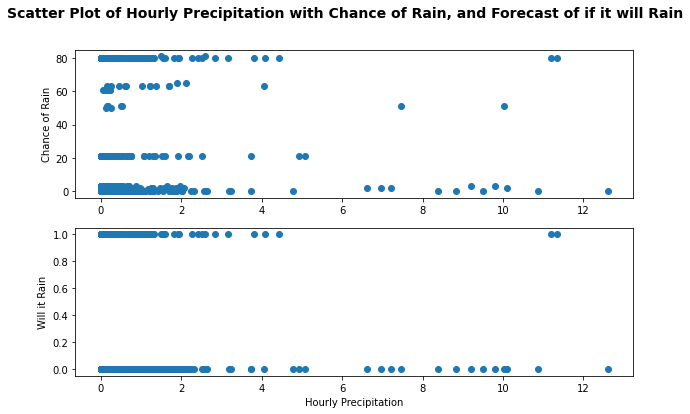

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Chance of Rain, and Forecast of if it will Rain', fontweight='bold', fontsize=14)

ax1.scatter(df['precipitation'], df['chance_of_rain'])
ax1.set_ylabel('Chance of Rain')

ax2.scatter(df['precipitation'], df['will_it_rain'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Will it Rain')

plt.show()

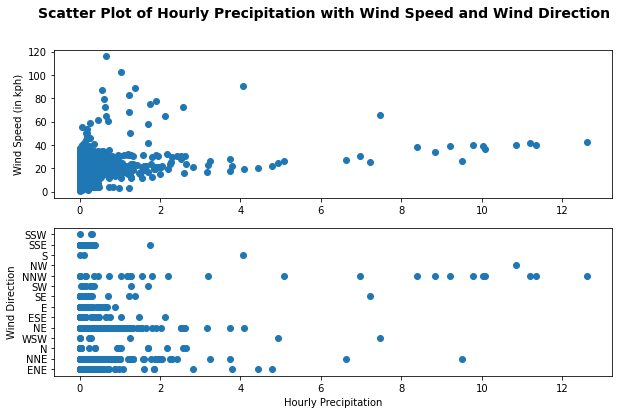

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Wind Speed and Wind Direction', fontweight='bold', fontsize=14)

ax1.scatter(df['precipitation'], df['wind_kph'])
ax1.set_ylabel('Wind Speed (in kph)')

ax2.scatter(df['precipitation'], df['wind_dir'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Wind Direction')

plt.show()

## Individual cities

In [25]:
path_makati = '/content/drive/MyDrive/prac-research/actual/data/research-data-makati - Sheet1.csv'
path_iloilo = '/content/drive/MyDrive/prac-research/actual/data/research-data-iloilo.csv'
path_cebu = '/content/drive/MyDrive/prac-research/actual/data/research-data-cebu.csv'

In [26]:
df_makati = pd.read_csv(
    path_makati,
    low_memory=False,
    parse_dates=['time']
)

df_cebu = pd.read_csv(
    path_cebu,
    low_memory=False,
    parse_dates=['time']
)

df_iloilo = pd.read_csv(
    path_iloilo,
    low_memory=False,
    parse_dates=['time']
)

precipitation_makati = df_makati.pop('precipitation')

df_makati.insert(0, 'precipitation', precipitation_makati)

precipitation_cebu = df_cebu.pop('precipitation')

df_cebu.insert(0, 'precipitation', precipitation_cebu)

precipitation_iloilo = df_iloilo.pop('precipitation')

df_iloilo.insert(0, 'precipitation', precipitation_iloilo)

In [30]:
corr_makati = df_makati.corr().round(3)

corr_iloilo = df_iloilo.corr().round(3)

corr_cebu = df_cebu.corr().round(3)

In [31]:
corr_makati.style.background_gradient()

,precipitation,longitude,latitude,temp_c,is_day,wind_kph,wind_degree,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
precipitation,1.000000,-0.000000,-0.000000,-0.001000,0.041000,-0.053000,-0.029000,-0.059000,0.263000,0.157000,0.037000,0.077000,0.076000
longitude,-0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
latitude,-0.000000,1.000000,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
temp_c,-0.001000,0.000000,0.000000,1.000000,0.632000,0.194000,0.472000,-0.182000,0.406000,-0.136000,0.981000,-0.012000,-0.036000
is_day,0.041000,0.000000,0.000000,0.632000,1.000000,0.230000,0.132000,-0.036000,-0.006000,0.080000,0.582000,-0.030000,-0.015000
wind_kph,-0.053000,0.000000,-0.000000,0.194000,0.230000,1.000000,-0.263000,0.183000,0.107000,0.342000,0.129000,0.156000,0.178000
wind_degree,-0.029000,0.000000,-0.000000,0.472000,0.132000,-0.263000,1.000000,0.075000,0.383000,-0.327000,0.516000,-0.068000,-0.110000
air_pressure,-0.059000,0.000000,0.000000,-0.182000,-0.036000,0.183000,0.075000,1.000000,-0.004000,0.131000,-0.230000,-0.002000,-0.002000
relative_humidity,0.263000,-0.000000,-0.000000,0.406000,-0.006000,0.107000,0.383000,-0.004000,1.000000,0.048000,0.452000,0.092000,0.084000
cloud,0.157000,-0.000000,0.000000,-0.136000,0.080000,0.342000,-0.327000,0.131000,0.048000,1.000000,-0.132000,0.210000,0.300000


In [32]:
corr_iloilo.style.background_gradient()

,precipitation,longitude,latitude,temp_c,is_day,wind_kph,wind_degree,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
precipitation,1.000000,0.000000,0.000000,-0.026000,-0.028000,0.260000,0.199000,-0.452000,0.283000,0.304000,-0.030000,0.110000,0.173000
longitude,0.000000,1.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
latitude,0.000000,1.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
temp_c,-0.026000,-0.000000,-0.000000,1.000000,0.685000,-0.003000,-0.027000,-0.031000,0.267000,-0.262000,0.989000,-0.126000,-0.155000
is_day,-0.028000,0.000000,0.000000,0.685000,1.000000,0.196000,-0.024000,0.032000,0.063000,0.076000,0.658000,0.060000,0.066000
wind_kph,0.260000,-0.000000,-0.000000,-0.003000,0.196000,1.000000,0.100000,-0.380000,0.226000,0.660000,0.009000,0.160000,0.377000
wind_degree,0.199000,-0.000000,0.000000,-0.027000,-0.024000,0.100000,1.000000,-0.503000,-0.028000,0.108000,-0.035000,0.029000,0.122000
air_pressure,-0.452000,0.000000,0.000000,-0.031000,0.032000,-0.380000,-0.503000,1.000000,-0.009000,-0.132000,-0.031000,0.117000,-0.041000
relative_humidity,0.283000,-0.000000,-0.000000,0.267000,0.063000,0.226000,-0.028000,-0.009000,1.000000,0.166000,0.268000,0.124000,0.161000
cloud,0.304000,0.000000,0.000000,-0.262000,0.076000,0.660000,0.108000,-0.132000,0.166000,1.000000,-0.251000,0.361000,0.504000


In [33]:
corr_cebu.style.background_gradient()

,precipitation,longitude,latitude,temp_c,is_day,wind_kph,wind_degree,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
precipitation,1.000000,0.000000,-0.000000,-0.010000,0.102000,0.425000,0.561000,-0.680000,0.422000,0.317000,0.019000,0.116000,0.136000
longitude,0.000000,1.000000,-1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
latitude,-0.000000,-1.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
temp_c,-0.010000,0.000000,-0.000000,1.000000,0.668000,-0.006000,-0.052000,-0.045000,0.224000,-0.236000,0.990000,-0.154000,-0.157000
is_day,0.102000,-0.000000,-0.000000,0.668000,1.000000,0.028000,0.009000,-0.073000,0.102000,-0.079000,0.655000,0.003000,-0.034000
wind_kph,0.425000,-0.000000,-0.000000,-0.006000,0.028000,1.000000,0.287000,-0.423000,0.364000,0.505000,0.045000,0.132000,0.242000
wind_degree,0.561000,0.000000,-0.000000,-0.052000,0.009000,0.287000,1.000000,-0.706000,0.250000,0.068000,-0.029000,-0.083000,-0.057000
air_pressure,-0.680000,0.000000,-0.000000,-0.045000,-0.073000,-0.423000,-0.706000,1.000000,-0.210000,-0.069000,-0.066000,0.153000,0.097000
relative_humidity,0.422000,-0.000000,0.000000,0.224000,0.102000,0.364000,0.250000,-0.210000,1.000000,0.480000,0.256000,0.180000,0.228000
cloud,0.317000,-0.000000,-0.000000,-0.236000,-0.079000,0.505000,0.068000,-0.069000,0.480000,1.000000,-0.188000,0.304000,0.412000
